# Project: TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


In [1]:
# here we are importing each lib we are planning to use in our data investigation
#   plan to use.
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tmdbsimple as tmdb
tmdb.API_KEY = 'daf33ced0d044c0cee4c9e66d9788902'
tmdb.REQUESTS_TIMEOUT = (2, 5)

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df = pd.read_csv('TMDbـmovieـdata/tmdb-movies.csv')
# check the dataframe sample of rows
df.head(100)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,258509,tt2974918,1.841779,0,233755553,Alvin and the Chipmunks: The Road Chip,Jason Lee|Justin Long|Bella Thorne|Matthew Gra...,http://www.foxmovies.com/movies/alvin-and-the-...,Walt Becker,Fast & furry-ous,...,"Through a series of misunderstandings, Alvin, ...",92,Adventure|Animation|Comedy|Family,Regency Enterprises|Fox 2000 Pictures|Sunswept...,12/17/15,278,5.7,2015,0.000000e+00,2.150550e+08
96,298382,tt2910904,1.823130,11930000,18340000,The Dressmaker,Kate Winslet|Liam Hemsworth|Caroline Goodall|J...,http://www.thedressmakermovie.com.au,Jocelyn Moorhouse,Revenge is back in fashion,...,"In 1950s Australia, beautiful, talented dressm...",118,Drama,Amazon Studios|Film Art Media|Apollo Media,10/1/15,197,6.9,2015,1.097560e+07,1.687279e+07
97,272693,tt1666801,1.758618,8500000,43528634,The DUFF,Mae Whitman|Robbie Amell|Bella Thorne|Bianca A...,http://www.duffmovie.com/,Ari Sandel,"You either know one, you have one, or you are ...",...,Bianca's universe turns upside down when she l...,100,Romance|Comedy,Wonderland Sound and Vision|CBS Films|Vast Ent...,2/20/15,753,6.8,2015,7.819997e+06,4.004633e+07
98,283445,tt2752772,1.742286,10000000,52882018,Sinister 2,Shannyn Sossamon|James Ransone|Tate Ellington|...,http://www.sinistermovie.com/,Ciaran Foy,"Be careful, children at play.",...,A young mother and her twin sons move into a r...,97,Horror,Alliance Films|Blumhouse Productions|IM Global...,8/19/15,331,5.5,2015,9.199996e+06,4.865144e+07


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
# check what we have in our data and whats the columns we can drop
# so i think we can drop the columns (homepage, keywords, tagline, imdb_id)
df.drop(['homepage', 'keywords', 'tagline'], axis=1, inplace=True)
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [6]:
new_budget = []
new_revenue = []
i = 0
start_time = time.time()
while len(new_budget) < len(df):
    try:
        id = df['id'].iloc[i]
        response = tmdb.Movies(id).info()
        responsebdg = response['budget']
        new_budget.append(responsebdg)
        responservn = response['revenue']
        new_revenue.append(responservn)
        i += 1
    except:
        new_budget.append(0)
        new_revenue.append(0)
        i += 1

print(time.time() - start_time)
print(len(new_budget))
print(len(new_revenue))
print(new_budget)
print(new_revenue)

3438.320702314377
10866
10866
[150000000, 150000000, 110000000, 245000000, 190000000, 135000000, 155000000, 108000000, 74000000, 175000000, 245000000, 176000003, 15000000, 88000000, 365000000, 44000000, 48000000, 130000000, 95000000, 160000000, 190000000, 30000000, 110000000, 40000000, 28000000, 150000000, 68000000, 81000000, 20000000, 61000000, 11000000, 49000000, 29000000, 40000000, 58000000, 13000000, 0, 175000000, 50000000, 11000000, 28000000, 90000000, 30000000, 75000000, 25000000, 2000000, 135000000, 12000000, 30000000, 4000000, 11800000, 35000000, 55000000, 60000000, 105000000, 20000000, 26000000, 60000000, 15000000, 70000000, 30000000, 120000000, 3500000, 65000000, 50100000, 35000000, 100000000, 20000000, 37000000, 35000000, 13000000, 25000000, 0, 150000000, 0, 0, 99000000, 35000000, 25000000, 2500000, 34000000, 80000000, 17000000, 35000000, 11000000, 31000000, 35000000, 4000000, 16000000, 50000000, 5000000, 50000000, 0, 10000000, 64000000, 90000000, 11930000, 8500000, 10000000

In [25]:
# add 2 new columns with the final updated values from the API
df['new_budget'] = new_budget
df['new_revenue'] = new_revenue

In [26]:
# then we got the outliers for the budget and will assume it with different values
dfbudget = df[df['new_budget'] <= 1000]
dfbudget.shape

(4787, 20)

In [27]:
# we made new list with the outliers, and will replace it instead
missingbudgt = np.random.randint(low =50000 ,high=13000000,size=4787)
dfbudget['new_budget'] = missingbudgt

/var/folders/jh/xdprh07n42xf0sh531dkghz80000gn/T/ipykernel_19763/216972676.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfbudget['new_budget'] = missingbudgt


In [28]:
# update the main dataframe with the outliers
dfbudget
df.update(dfbudget)

/var/folders/jh/xdprh07n42xf0sh531dkghz80000gn/T/ipykernel_19763/957100392.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.update(dfbudget)


In [29]:
dfrevn = df[df['new_revenue'] <= 2000]

In [31]:
# the same which we made it with the budget outliers do it aging with the revenue
missingrevn = np.random.randint(low =20000 ,high=40000000,size=4865)
dfrevn['new_revenue'] = missingrevn

/var/folders/jh/xdprh07n42xf0sh531dkghz80000gn/T/ipykernel_19763/3223620120.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfrevn['new_revenue'] = missingrevn


In [32]:
df.update(dfrevn)
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,new_budget,new_revenue
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07,1.855217e+07,5.211266e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08,2.953501e+07,1.167054e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,2.000000e+03,2.521000e+03
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,4.000000e+06,8.038173e+06
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,8.978798e+06,2.145816e+07
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07,1.800000e+07,3.790241e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,3.800000e+08,2.920357e+09


In [34]:
# creat a new dataframe file, as final one
df.to_csv('finaltmdb.csv')

# the new data file is ready, we shall proceed with the creating new dataframe as final one to use it

In [35]:
# check the data for the final dataframe which we made it above
dfFinal = pd.read_csv('finaltmdb.csv')
dfFinal.shape
dfFinal.info()
dfFinal.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10866 non-null  int64  
 1   id                    10866 non-null  float64
 2   imdb_id               10856 non-null  object 
 3   popularity            10866 non-null  float64
 4   budget                10866 non-null  float64
 5   revenue               10866 non-null  float64
 6   original_title        10866 non-null  object 
 7   cast                  10790 non-null  object 
 8   director              10822 non-null  object 
 9   overview              10862 non-null  object 
 10  runtime               10866 non-null  float64
 11  genres                10843 non-null  object 
 12  production_companies  9836 non-null   object 
 13  release_date          10866 non-null  object 
 14  vote_count            10866 non-null  float64
 15  vote_average       

,Unnamed: 0,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,new_budget,new_revenue
count,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04,1.086600e+04,1.086600e+04
mean,5432.500000,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07,1.855217e+07,5.211266e+07
std,3136.888347,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08,2.953501e+07,1.167054e+08
min,0.000000,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,2.000000e+03,2.521000e+03
25%,2716.250000,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,4.000000e+06,8.038173e+06
50%,5432.500000,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,8.978798e+06,2.145816e+07
75%,8148.750000,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07,1.800000e+07,3.790241e+07
max,10865.000000,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,3.800000e+08,2.920357e+09


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [36]:
# while looking to the data looks like all is ok and the column which we didnt need i already dropped in the previous section
# df.drop(['homepage', 'keywords', 'tagline'], axis=1, inplace=True)
# also after filling the missing data of our dfFinal dropped the old columns for the budg and revn
# only the released date should be changed to date time
dfFinal['release_date'] = pd.to_datetime(dfFinal['release_date'])
dfFinal['month'] = dfFinal['release_date'].dt.month_name()
dfFinal['quarter'] = dfFinal['release_date'].dt.quarter
dfFinal.head(10)

,Unnamed: 0,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,...,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,new_budget,new_revenue,month,quarter
0,0,135397.0,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,...,2015-06-09,5562.0,6.5,2015.0,1.379999e+08,1.392446e+09,150000000.0,1.671713e+09,June,2
1,1,76341.0,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,...,2015-05-13,6185.0,7.1,2015.0,1.379999e+08,3.481613e+08,150000000.0,3.788583e+08,May,2
2,2,262500.0,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,...,2015-03-18,2480.0,6.3,2015.0,1.012000e+08,2.716190e+08,110000000.0,2.952382e+08,March,1
3,3,140607.0,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,...,2015-12-15,5292.0,7.5,2015.0,1.839999e+08,1.902723e+09,245000000.0,2.068224e+09,December,4
4,4,168259.0,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,...,2015-04-01,2947.0,7.3,2015.0,1.747999e+08,1.385749e+09,190000000.0,1.515048e+09,April,2
5,5,281957.0,tt1663202,9.110700,135000000.0,5.329505e+08,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"In the 1820s, a frontiersman, Hugh Glass, sets...",...,2015-12-25,3929.0,7.2,2015.0,1.241999e+08,4.903142e+08,135000000.0,5.329505e+08,December,4
6,6,87101.0,tt1340138,8.654359,155000000.0,4.406035e+08,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,"The year is 2029. John Connor, leader of the r...",...,2015-06-23,2598.0,5.8,2015.0,1.425999e+08,4.053551e+08,155000000.0,4.406035e+08,June,2
7,7,286217.0,tt3659388,7.667400,108000000.0,5.953803e+08,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,"During a manned mission to Mars, Astronaut Mar...",...,2015-09-30,4572.0,7.6,2015.0,9.935996e+07,5.477497e+08,108000000.0,6.301619e+08,September,3
8,8,211672.0,tt2293640,7.404165,74000000.0,1.156731e+09,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,"Minions Stuart, Kevin and Bob are recruited by...",...,2015-06-17,2893.0,6.5,2015.0,6.807997e+07,1.064192e+09,74000000.0,1.156731e+09,June,2
9,9,150540.0,tt2096673,6.326804,175000000.0,8.537086e+08,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,"Growing up can be a bumpy road, and it's no ex...",...,2015-06-09,3935.0,8.0,2015.0,1.609999e+08,7.854116e+08,175000000.0,8.576112e+08,June,2


<a id='eda'></a>
## Exploratory Data Analysis

### Which Quarter in the year have the most released movies ?

In [37]:
def drawFigure(x, title, xlable, ylable, type):
    x.plot(x=x, kind=type, fontsize= 10, figsize=(10,6))
    plt.title(title, fontsize=18)
    plt.xlabel(xlable, fontsize=13)
    plt.ylabel(ylable, fontsize=13)
    plt.show()

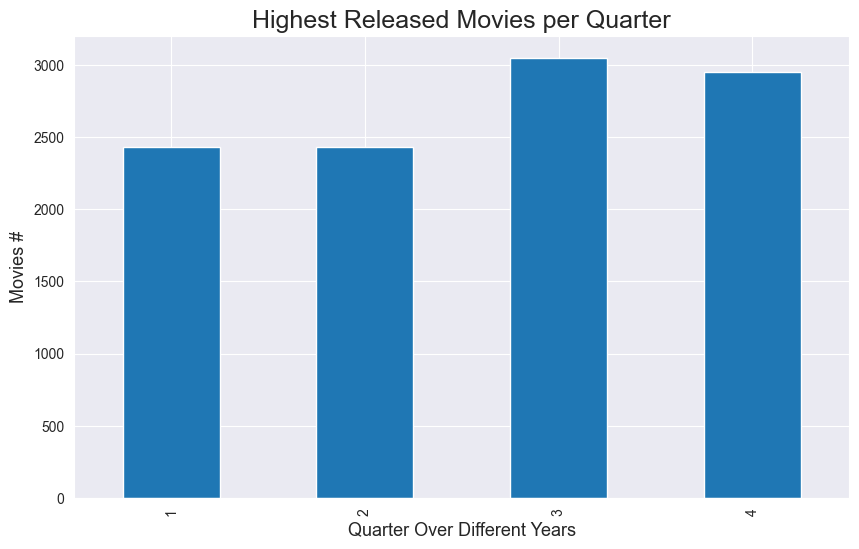

In [38]:
quarters = dfFinal.groupby('quarter').count()['id']
drawFigure(quarters,'Highest Released Movies per Quarter', 'Quarter Over Different Years', 'Movies #', 'bar')

### **Conclusion :** the above chart showing that in the Q3 of the year most of the movies released in this period of the year, that's said its might be on jul, aug and sep this is the most common period for releasing movies

### YoY Comparing Released Movies

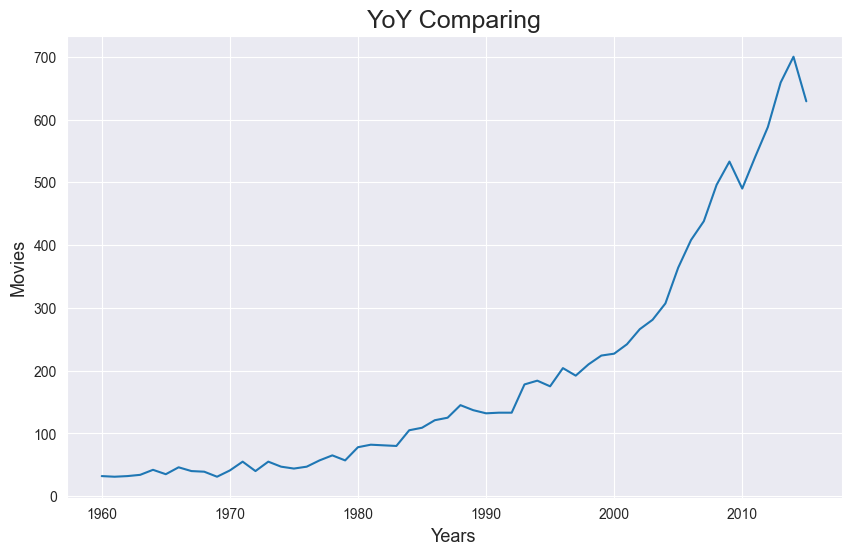

In [39]:
moviesyears = dfFinal.groupby('release_year').count()['id']
drawFigure(moviesyears, 'YoY Comparing', 'Years', 'Movies', 'line')

### **Conclusion :** the peak of releasing movies it was on 2014 then start drop down again on 2015, maybe the result will be different while checking in this time, due to the industrial rules is changes since we have the streaming companies
##### 2013 with total 659
##### 2014 with total 700
##### 2015 with total 629

### Which year released the highest count of movies?

In [40]:
moviesyears = dfFinal.groupby('release_year').count()['id'].idxmax()
int(moviesyears)

2014

### **Conclusion :** 2014 is the most year release movies, lets check the top 5 genre released in 2014?

In [41]:
dfFinal2014 = dfFinal[dfFinal['release_year'] == 2014]
generesplit = dfFinal2014['genres'].str.cat(sep='|')

In [42]:
result = pd.Series(generesplit.split('|'))
totalgenere14 = result.value_counts().nlargest(5)
totalgenere14

Drama       284
Comedy      185
Thriller    179
Action      129
Horror      105
dtype: int64

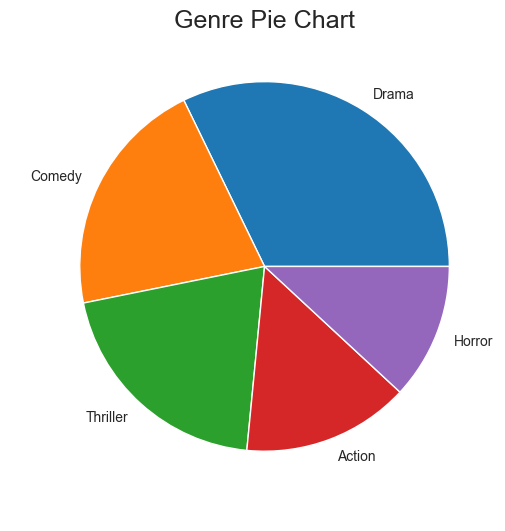

In [43]:
# Pie Chart Showing the top Genre 2014
drawFigure(totalgenere14, 'Genre Pie Chart', ' ',' ', 'pie')

### **Conclusion :** Drama is the most Preferred Genre

### Which month is the best, to release your movie ?

In [44]:
monthrelease = dfFinal.groupby('month').count()['id']
topmonths = monthrelease.nlargest(3)

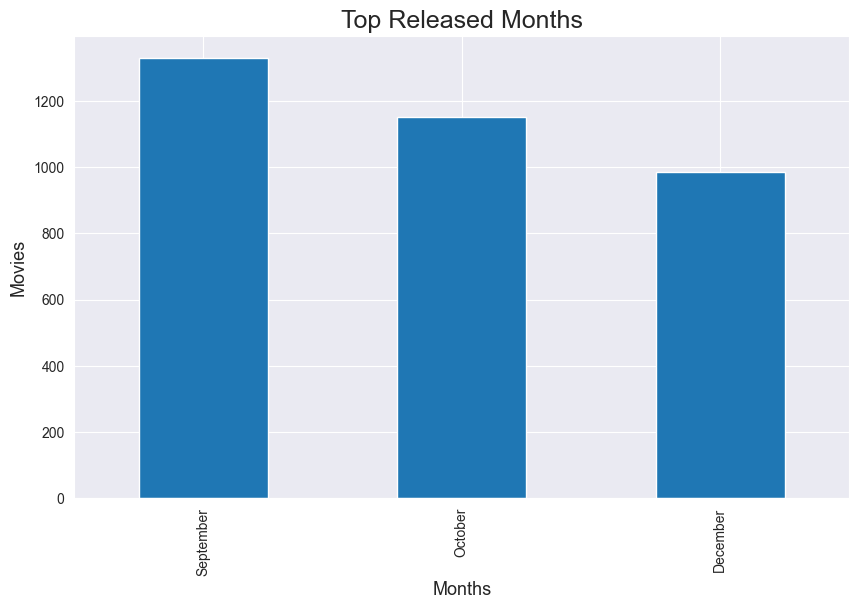

In [45]:
drawFigure(topmonths, 'Top Released Months', 'Months', 'Movies' ,'bar')

### **Conclusion :** Sep and October the heights its might be related to the seasonality and Dec related the year-end vacation

### Whose is the top Directors released movies?

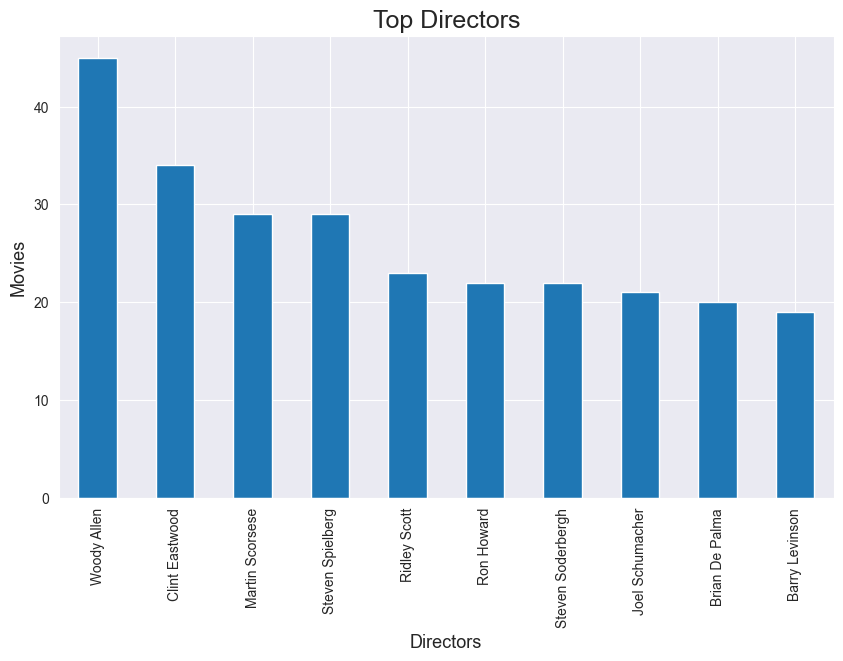

In [46]:
direc = dfFinal.groupby('director').count()['id']
topdirec = direc.nlargest(10)
drawFigure(topdirec, 'Top Directors', 'Directors', 'Movies', 'bar')

### **Conclusion :** Woody Allen is an American film director he has the most released movies in our data set, lets check woody movies vs the revenue. and popularity if applicable

/var/folders/jh/xdprh07n42xf0sh531dkghz80000gn/T/ipykernel_19763/3025892403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  woody['popularity'] = woody['popularity'].astype(float)
/var/folders/jh/xdprh07n42xf0sh531dkghz80000gn/T/ipykernel_19763/3025892403.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  woodypop = woody.groupby('release_year').mean()['popularity']


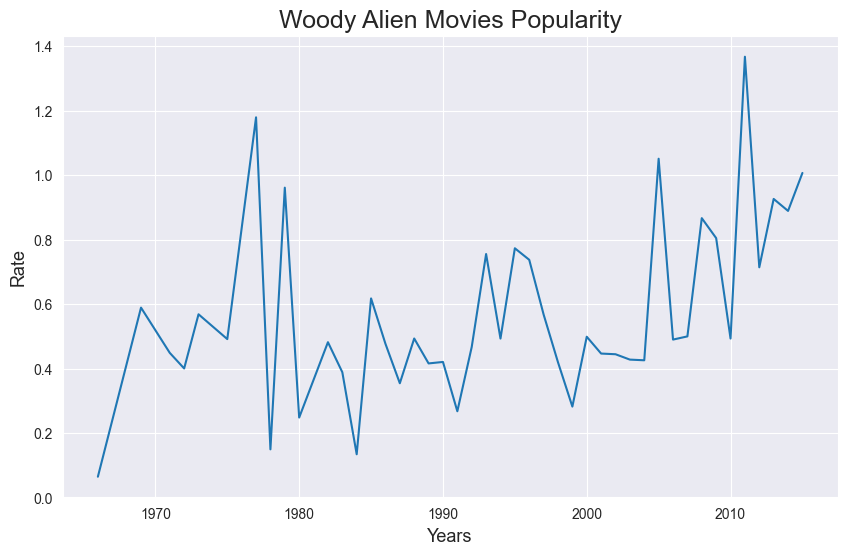

In [47]:
woody = dfFinal[dfFinal['director'] == 'Woody Allen' ]
woody['popularity'] = woody['popularity'].astype(float)
woodypop = woody.groupby('release_year').mean()['popularity']
drawFigure(woodypop, 'Woody Alien Movies Popularity', 'Years', 'Rate', 'line')

/var/folders/jh/xdprh07n42xf0sh531dkghz80000gn/T/ipykernel_19763/576269414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  woody['new_revenue'] = woody['new_revenue'].astype(int)
/var/folders/jh/xdprh07n42xf0sh531dkghz80000gn/T/ipykernel_19763/576269414.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  woodyrev = woody.groupby('release_year').sum()['new_revenue']


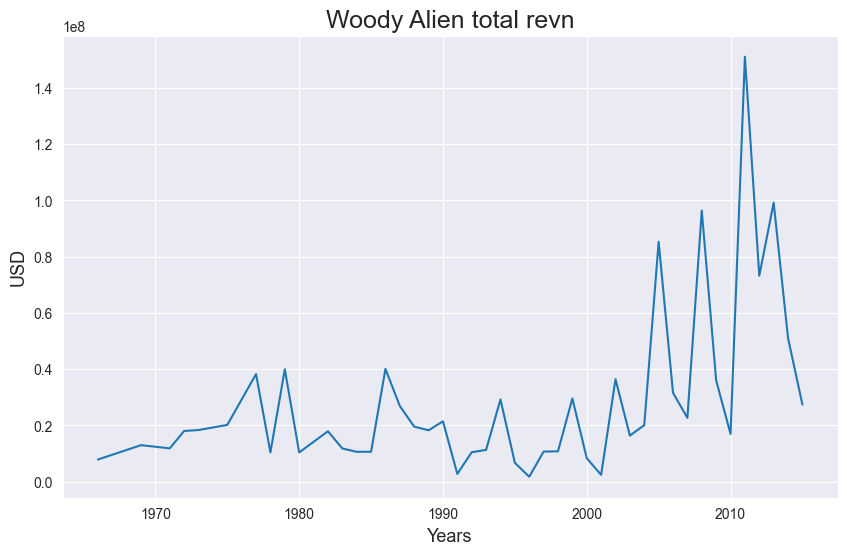

In [48]:
woody = dfFinal[dfFinal['director'] == 'Woody Allen' ]
woody['new_revenue'] = woody['new_revenue'].astype(int)
woodyrev = woody.groupby('release_year').sum()['new_revenue']
drawFigure(woodyrev, 'Woody Alien total revn', 'Years', 'USD', 'line')

### **Conclusion :** from the above charts its shown this is positive coloration between woody popularity and his total return revenue

### Whose is the top Actos released movies?

In [49]:
ACTORS = dfFinal['cast'].str.cat(sep='|')

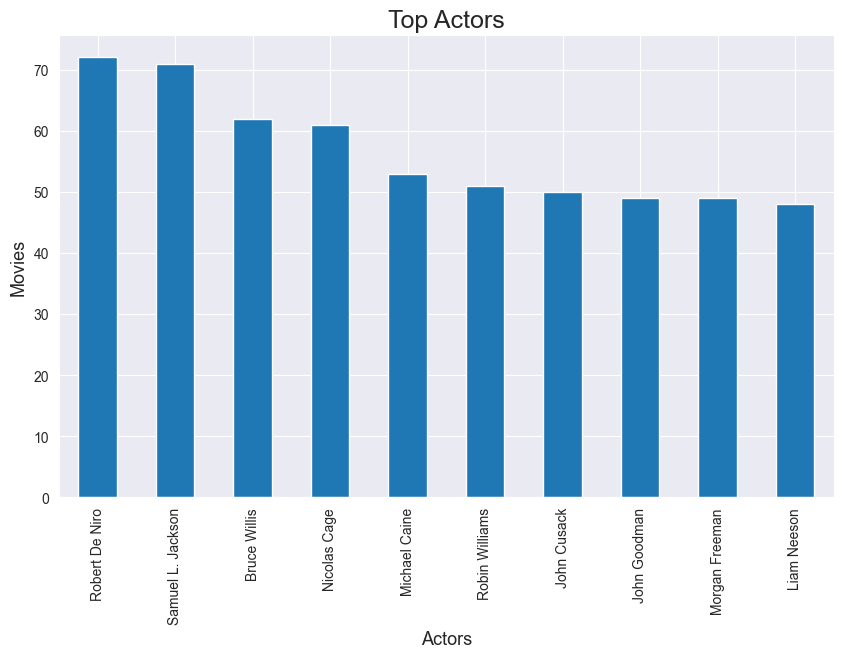

In [50]:
actresult = pd.Series(ACTORS.split('|'))
totalact = actresult.value_counts().nlargest(10)
drawFigure(totalact, 'Top Actors', 'Actors', 'Movies', 'bar')

### Top Movies, in comparing with the total revenue

<AxesSubplot: xlabel='new_revenue', ylabel='original_title'>

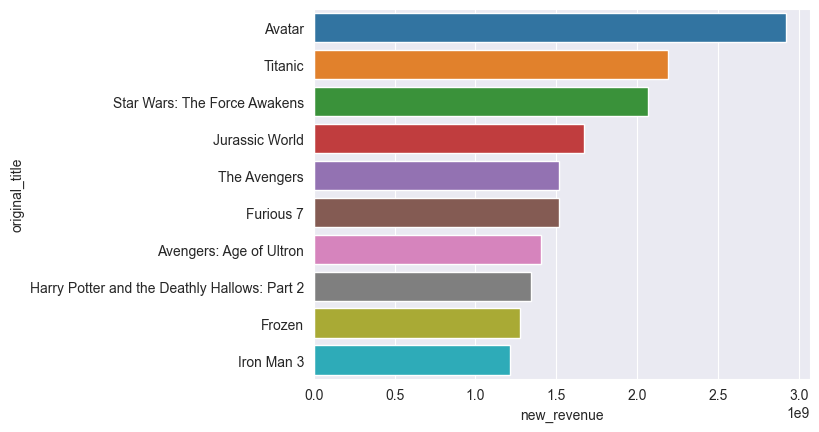

In [51]:
budgetmovies = dfFinal[['new_revenue', 'original_title']].copy()
budgetmovies= budgetmovies.sort_values(by='new_revenue', ascending=False)
budgetmovies = budgetmovies.head(10)
sns.barplot(y='original_title', x='new_revenue', data=budgetmovies, orient="h")

### **Conclusion :** avatar is the highest revenue movie, lets check the top list for the budget movies

### Top Movies, in comparing with the total budget

<AxesSubplot: xlabel='new_budget', ylabel='original_title'>

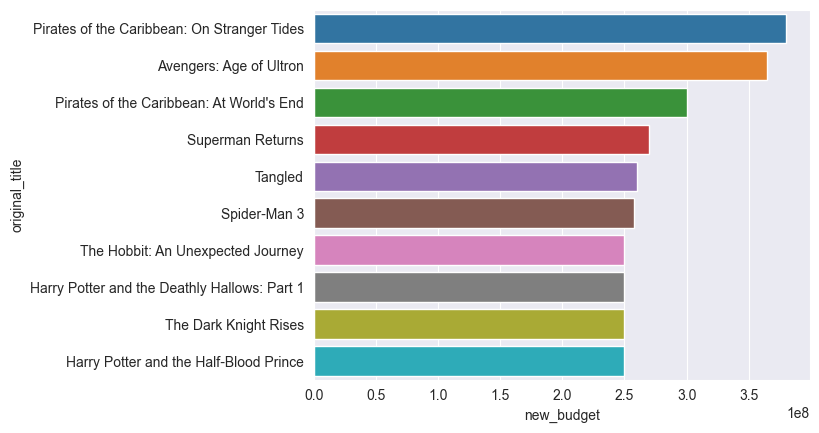

In [52]:
budgetmovies = dfFinal[['new_budget', 'original_title']].copy()
budgetmovies= budgetmovies.sort_values(by='new_budget', ascending=False)
budgetmovies = budgetmovies.head(10)
sns.barplot(y='original_title', x='new_budget', data=budgetmovies, orient="h")

### Top Plays Production Companies in the industry

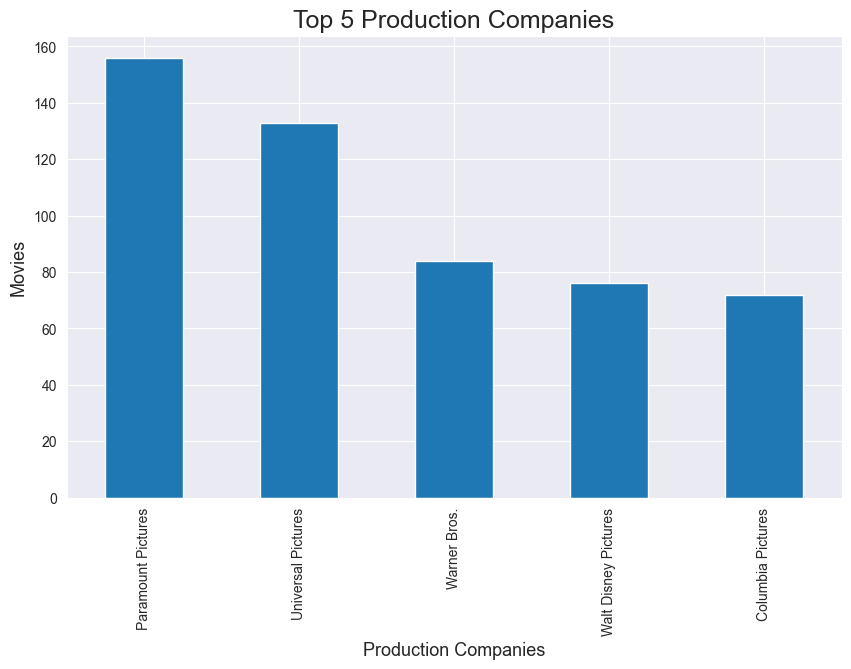

In [53]:
topproduction = dfFinal.groupby('production_companies').count()['id'].nlargest(5)
drawFigure(topproduction, 'Top 5 Production Companies', 'Production Companies', 'Movies', 'bar')

### Relation Between Popularity and Revenue

Text(0, 0.5, 'Revenue')

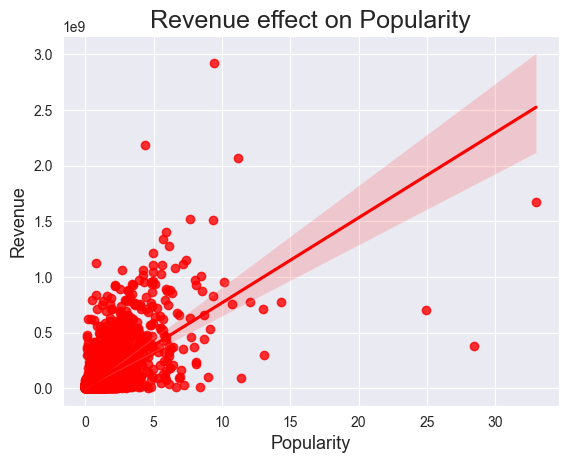

In [54]:
sns.regplot(x=dfFinal['popularity'], y=dfFinal['new_revenue'],color='r')
plt.title('Revenue effect on Popularity', fontsize=18)
plt.xlabel('Popularity', fontsize=13)
plt.ylabel('Revenue', fontsize=13)

### **Conclusion :** There is positive coloration between the revenue and popularity

### Relation Between Popularity and RunTime

Text(0, 0.5, 'Runtime')

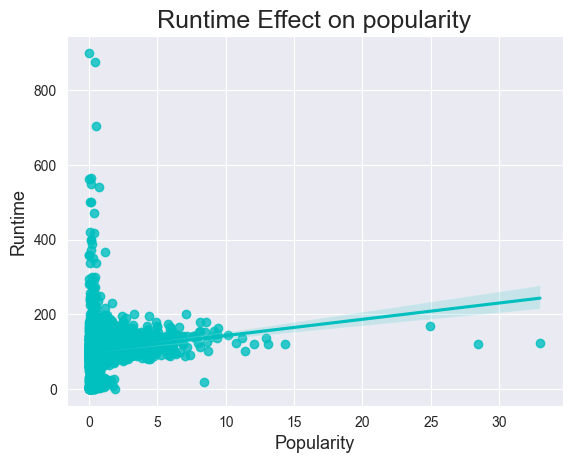

In [55]:
sns.regplot(x=dfFinal['popularity'], y=dfFinal['runtime'],color='c')
plt.title('Runtime Effect on popularity', fontsize=18)
plt.xlabel('Popularity', fontsize=13)
plt.ylabel('Runtime', fontsize=13)

### **Conclusion :** The AVG Running time for the highest popularity between 100 and 150 min

<a id='conclusions'></a>
## Conclusions

> 1-	Quarter 3 from the year has the most released movies, followed by quarter 4.
> 2-	While checking the movies production industry we check the Year over Year trending line and it’s showing the in the 2000 start the booming and the peak of the produced movies was in 2014 with total movies 700 followed by 659 in 2013 and 629 in 2015, from this Q trying to check if the industry in growth or not.
> 3-	Now we must check the most genre movies released each year, that will help us to see the market competition and the audience preferred, we found that Drama is the most genre produced each year.
> 4-	Now we must cross check the first question to make sure what’s the best date to release our movie, so we cross check the highest months of the releasing movies and its showing Sep, Oct, and Dec is the most months releasing movies its might be related to the vacations season, and the year-end holydays that’s explain why we have the most released movies in Q3 and followed by Q4
> 5-	Now let’s see who the main player director, and we found that woody Allen, that’s guide me to check his revenue and popularity
> 6-	Checked woody Allen popularity and we found its upside down, but he has extremely high popularity movies in 1977 and 2011 followed by 2005 and 2015, woody is great director and he have great work as well so let’s check his profitability
> 7-	Woody in 2011 his highest movie revenue which it has high popularity as well, followed by 2013
> 8-	 Now we will check the most actors released movies we might need to select some of them for upcoming movie Robert De Niro has released the highest count of movies.
> 9-	After checking the top 10 Revenues, we found Avatar is the most movie gain profit and we said profit, especially since it’s not in the highest 10 movies spent budget
> 10-	 The top 10 movies spent budget, “Pirates of the Caribbean: On Stranger Tides” is the top of the list, and sadly to say it’s not even in the top 10 movies in the revenue
> 11-	Top producer in the industry, Paramount Pictures with total 156 movies, followed by Universal Pictures for 133, and Warner Bros. with 84 etc., so actually the main big players in the market is Paramount and Universals
> 12-	The relation between total revenue and the popularity showing its positive coloration
> 13-	So, let’s check one factory might be effect the popularity, running time between 100 and 150 min showing they harvest the highest popularity

## Limitations

> i have doubt about the data provided to me specialy when i check the data i found that there is many missing values, which i forced to check the data personally thru API and even after updaing the data still i found some missing values and i assume it, then i found some outliers such as but not limited to the budget some movies showing that the budget is 0 or less than 30000 so i tried to check it and assume random numbers
> then while updating the full list thru the API, its approx. take 40 min for each running time
> also there is some columns specially for the actors and the casting not for the missing values while its around 50% from our data thats said it will affect our results so i tried to keep all data
> data for the cast and genre specialty its not formatted well so i split it by | into another list to be able to get the right values